In [2]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline

# Weibull 분포

: 어떤 제품의 수명시간 x가 형상모수 2.2, 척도모수 1200인 와이블 분포를 따른다고 할 떄, 이 제품이 적어도 1500시간 이상 작동할 확률을 구하라.

In [3]:
# weibull 분포에서 확률 계산하기

x = 1500
alpha = 2.2
beta = 1200

prob = stats.weibull_min.cdf(x, alpha, scale = beta)
print("P(X >= x): {:.3f}".format((1-prob)))

P(X >= x): 0.195


# 이항분포

: 도장공정에서 광택도 불량이 40%나 된다고 함. 3대의 차량을 임의로 선택했을 떄, 불량대수가 각각 0,1,2,3 대가 나올 확률은 얼마인가요?

In [4]:
# n의 수
n = 3
for i in range(n+1):
    # 이항분포 Probability Mass Function
    prob = stats.binom.pmf(k=i, n=n, p=0.4)
    print("P(X={0}) = {1:.3f}".format(i,prob))

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


# 포아송분포

: 어느 전화교환대에는 1분당 평균 2회의 전화가 걸려 온다고 한다. 전화의 도착 횟수가 포아송분포를 따른다면, 이 교환대에 1분당 3번의 전화가 걸려올 확률은 얼마인가요? 이 교환대에 1분당 최대 2회 이하의 전화가 걸려올 확률은 얼마인가요?

In [5]:
# 평균
m = 2
# 1분당 3번의 전화가 걸려올 확률
prob = stats.poisson.pmf(3,m)
print("1분당 {0}번의 전화가 걸려올 확률 : {1:.1f}".format(3, prob*100))

# 1분당 최대 2회 이하의 전화가 걸려올 확률
cdf_prob = stats.poisson.cdf(2,m)
print("1분당 최대 {0}회 아히의 전화가 걸려올 확률: {1:.1f}".format(2, cdf_prob*100))

1분당 3번의 전화가 걸려올 확률 : 18.0
1분당 최대 2회 아히의 전화가 걸려올 확률: 67.7


# 정규성 검정

In [7]:
# 정규성 검정
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [8]:
from scipy.stats import shapiro

In [10]:
ds_camshaft = pd.read_csv("/home/piai/test/Practice/data/camshaft.csv", engine="python")
ds_camshaft.head()

,Length,Supp1,Supp2
0,601.4,598.0,601.6
1,601.6,599.8,600.4
2,598.0,600.0,598.4
3,601.4,599.8,600.0
4,599.4,600.0,596.8


In [11]:
data1 = ds_camshaft['Supp1']

# 정규성 검정 : Shapiro-Wilk Test
statistic, p = stats.shapiro(data1)
print("Shapiro-Wilk Tst: statistic={}, p-value={}".format(statistic, p))

Shapiro-Wilk Tst: statistic=0.9788156747817993, p-value=0.10744144767522812


# [실습]정규성 검정

In [18]:
# 실습
ds_mat = pd.read_csv("/home/piai/test/Practice/data/2sample_t_test.csv", engine="python")
ds_mat.head()
# 슬라이싱해서 데이터가 있는 부분만 따로 가져와야 됨
data1 = ds_mat['Mat_A']
data1

0     73.4
1     77.0
2     73.7
3     73.3
4     73.1
5     71.5
6     74.5
7     77.5
8     76.4
9     77.7
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: Mat_A, dtype: float64

In [ ]:
#정규성 검정 - Shapiro-Wilk 테스트
data2 = ds_mat['Mat_B'][0:10]
data2

# 모평균 추정(모표준편차 아는 경우)

: 새로운 품종의 배추 40통을 랜덤추출하여 무게를 측정한 결과가 다음과 같음. (단, 모표준편차는 0.397로 알려져 있음) 이 자료로부터 신품종 배추의 평균 무게에 대한 95% 신뢰구간을 구하시오.

In [15]:
df = pd.DataFrame({"sample":[3.6,2.9,2.8,2.6,3.4,3.2,2.2,2.6,2.6,2.4,2.4,2.6,3.4,2.4,2.1,2.6,3.0,2.4,2.7,2.4,2.6,2.9,2.9,2.0,2.7,2.2,2.8,2.7,1.8,2.5,3.0,3.2,2.8,2.6,3.2,3.1,2.9,2.7,2.7,2.2]})
df.head()
lower, upper = stats.norm.interval(0.95, loc=np.mean(df), scale=0.397/np.sqrt(40))
print("신뢰구간: ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간: ([2.57],[2.82])


# 모평균 추정(모표준편차를 모르는 경우)

: 제품개발자는 새로 개발된 강종의 평균 인장강도를 55kg/mm^2으로 기대하고 있음. 이를 검증하기 위해 시험 생산되는 강종 중 임의로 20개의 코일을 대상으로 랜덤하게 시편을 채취하였음. 상기 자료로부터 표본평균은 54.860, 표본표준편차는 1.0081임을 알았음. 이 모평균값의 95% 신뢰구간을 추정하시오.

In [17]:
df = pd.DataFrame({'sample':[54.1, 53.3, 56.1, 55.7, 54.0, 54.1, 54.5, 57.1, 55.2, 53.8, 54.1, 54.1, 56.1, 55.0, 55.9, 56.0, 54.9, 54.3, 53.9, 55.0]})

lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = scipy.stats.sem(df))
print("신뢰구간: ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간: ([54.39],[55.33])


# 평균 검정(모집단 표준편차를 모르는 경우)

: 고객서비스센터의 고객만족도 평균은 76.7이다. 과제수행자가 개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다. 과제수행자의 개선활동이 만족도를 변화시켰는가?

In [19]:
df = pd.DataFrame({"sample": [74.5,81.2,73.8,82.0,76.3,75.7,80.2,72.6,77.9,82.8]})
t_result = stats.ttest_1samp(df,76.7)

t,p=t_result.statistic.round(3), t_result.pvalue.round(3)

print("1-Sample t-test")
print("t통계량 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t통계량 : [0.864]
p-value : [0.41]


# 2 Sample t-test

: 고객만족도 확인을 위하여 A고객과 B고객에 대해 Survey하여 다음의 데이터를 얻었다. A고객과 B 고객의 모평균에 차이가 있다고 할 수 있는가?

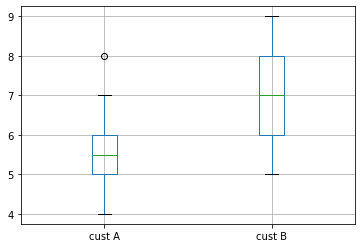

In [23]:
# 2 Sample t-test
df = pd.read_csv("/home/piai/test/Practice/data/2sample.csv", engine="python")

df.boxplot(['cust A', 'cust B'])

In [24]:
# 정규성 검정 : Shapiro-Wilk Test
statistic, p = stats.shapiro(df['cust A'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9094840288162231, p-value=0.06230909377336502


In [26]:
# 정규성 검정 : Shapiro-Wilk Test
statistic, p = stats.shapiro(df['cust B'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9119446873664856, p-value=0.06941930204629898


둘의 p-value가 모두 0.05보다 크므로, 둘 다 정규성이 있다고 볼 수 있다.

In [25]:
# equal variance test
stats.levene(df['cust A'], df['cust B'])

LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

p-value가 0.05보다 큰 0.83이므로, 두 집단의 분산은 같다고 할 수 있다.

In [27]:
# 2-Sample t-test
t_result = stats.ttest_ind(df['cust A'], df['cust B'], equal_var = True)

# 2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-Sample t-test의 t값 p값 출력
print("2-Sample t-test")
print(" t검정통계량: {}".format(t))
print(" p-value : {}".format(p))

2-Sample t-test
 t검정통계량: -3.596
 p-value : 0.001


결론 : 유의수준 5%에서 검정결과 P값이 0.001 이므로 고객간에 고객만족도의 차이가 있다.

# Paired t-test

: 회사원 10명에 대해 영어점수가 학원가기 전의 점수와 학원 수강 후에 영어점수가 짝을 이루고 있다. 회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라.

In [29]:
# Paired t-test
df = pd.read_csv("/home/piai/test/Practice/data/paired.csv", engine="python")
df.head()

,before,after
0,720,810
1,589,670
2,780,790
3,648,712
4,720,810


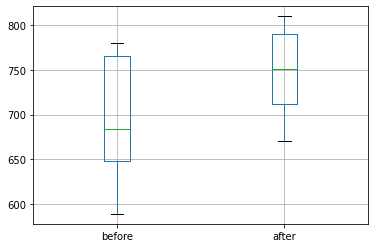

In [30]:
df.boxplot(['before', 'after'])

In [31]:
# Paired t-test
t_result = stats.ttest_rel(df['before'], df['after'])

# Paired t-test t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# Paired t-test t값 p값 출력
print("Paired t-test")
print('t검정 통계량 = %.3f, pvalue = %.3f'% t_result)

Paired t-test
t검정 통계량 = -5.324, pvalue = 0.000


결론 : 유의수준 5%에서 검정결과 P값이 0.000이므로 학원 수강 전후의 점수는 차이가 있다고 할 수 있다.

# 1 Proportion test

: 고급강 A제품을 가공하는 국내 고객사는 전체 중에 10% 정도가 된다. 한 해 동안 A제품의 품질에 대해 노력을 하여 전체고객 중 100여 개의 업체를 표본으로하여 가공품질을 확인한 후 15개의 업체가 만족을 표현했다. 과연 품질개선을 한 결과로 기존보다 전체 고객 중 사용비율의 차이가 있는 것인가?

In [32]:
from statsmodels.stats.proportion import proportions_ztest

# 가설 설정
# H0 : p = 0.1
# H1 : p != 0.1

#Proportion test
count = 15
n_obs = 100
value = 0.1

# Proportion test 실행
stat,pval = proportions_ztest(count, n_obs, value)

# Proportion test 결과 출력
print("1 Proportion test")
print('z: {0:0.3f}'.format(stat))
print('p: {0:0.3f}'.format(pval))

1 Proportion test
z: 1.400
p: 0.161


p value가 0.05보다 크므로 H0를 채택한다.

# 2 Proportion test

: 동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다. 두 공정의 불량률이 같다고 할 수 있는가? 공장 1: N1=1000, X1 = 4 / 공장 2 : N2 = 1200, X2 =1

In [33]:
# 2 Proportion test

# 가설수립
# H0: p1 = p2
# H1: p1 != p2

# 변수 선언
count = np.array([4,1])
n_obs = np.array([1000,1200])

# Proprtion test 실행
stat, pval = proportions_ztest(count, n_obs)

# Proportion test 결과 출력
print(" 2 Proportion test")
print("z검정통계량: {0:0.3f}".format(stat))
print("p-value: {0:0.3f}".format(pval))

 2 Proportion test
z검정통계량: 1.553
p-value: 0.120


결론 : 이 공장은 불량율에 차이가 없다.